# Post analysis of **free** VTRs nested sampling runs (with 10 poles)

Cases are ordered in the same way as the original runs (referred to as the OA, "original analysis").

We use `hyper_free.py`, not `hyper_free12.py`.

Note that the variation in the $\log Z$ estimates of the nested sampling runs is large enough such that different runs may give *different* "sure-thing" hypotheses (i.e. model orders with a probability of 1). In other words, the MAP model orders may not be reproducible across different nested sampling runs. Although this phenomenon may seem disturbing,

- It is actually completely consistent with nested sampling theory: one run gives you only one point estimate of $\log Z$ with an estimated error bar -- proper error bars need multiple nested sampling runs

- More importantly: different MAP model orders have actually only small impact on the end results: the inferred VTRs, formants, "glottal flow", and spectral features. The model is robust against misspecification of the model order, an effect which is also noted in Bretthorst (1988).

## Model order posterior

<img src="post/model_order_posterior_free.png" alt="2D posterior of the model orders given `new` and file" style="height: 400px;"/>

## Trend order posterior

<img src="post/trend_order_posterior_free.png" style="height: 300px;"/>

## Conclusions

- Allowing higher $Q$ makes the model expand more and more intricate structure, which may or may not be useful for the application at hand. (Note that our representation of the transfer function by a sum of decaying sinusoids allows for poles *and zeros*.) As a result, PDRs approach 0 dB.

- The trend order $P$ shifts away from its maximum value ($P=10$) and is always well-determined, which shows that the detrending concept is sound when $Q$ is allowed to be relatively large. Allowing higher $Q$ enabled the "absorption" of frequencies by poles instead of trends with high value of $P$. This is in contrast with the original experiments where $Q \leq 5$.

- The overall behavior shows again just how uniformative our prior is: the given expectation values only constrain the prior extremely weakly.

- The higher the lower bound for the bandwidth, the less the model will be inclined to split up peaks -- since higher bandwidth means wider peaks. Next to decreasing the value of $Q$ and adding extra moment information to our prior, this parameter can thus be used to get more "formant-like" measurements, i.e. to get 3 or 4 smoothed peaks (representing F1, F2, etc.) instead of that annoying peak-splitting behaviour.

  But it is important to remember that according to the model and given the assumptions made about the noise, trend, system linearity, etc., these peaks are better modeled as (physical) VTRs rather than smoothed simplifying formants. In addition, all but one models stop at a value of $Q < 10$, suggesting that the peak splitting process is well-defined as it stops until the residuals can be modeled sufficiently well as white noise. Furthermore, we don't get "shaping poles" with large bandwidths -- so we are not really expanding the spectrum (otherwise the model would always prefer $(P=10,Q=10)$); something more sophisticated is going on.

- In 3 of 5 cases (`little`, `you`, `shore`) an extra and well-resolved formant was discovered. These are the cases where this analysis is preferred over the OA.

In [1]:
%pylab inline
import analyze
from hyper_free import get_data, get_hyperparameters
from plot import show_residuals

def do(file, new, P=None, Q=None, **kwargs):
    data = get_data(file)
    hyper = get_hyperparameters()
    if P is None:
        return analyze.analyze_average(new, Q, data, hyper, **kwargs)
    else:
        order = (P, Q)
        return analyze.analyze(new, order, data, hyper, **kwargs)

Populating the interactive namespace from numpy and matplotlib


## `that`

There are two equally plausible hypotheses: the low frequency content in the data is either part of the VT transfer function (`Q=7`) , or part of the trend (`Q=6`). We will only discuss the latter in this list.

- F1 and F2 both split in doublets. The doublets for F1 are well-resolved. F2 is split in two very sharp peaks (bandwidth about 10 Hz, which is the lower bound) which are very close to each other. This seems like an artifact resulting from the very tolerant bandwidth bounds, but runs from `hyper_free12` confirmed the very small bandwidth. It doesn't happen, though, for the original `(new=True, Q=5)` model, which has comparable SNR and a $\log Z$ difference of only 6.

- F3 and F4 are extremely well resolved.

- Other than the splitting of F2, this model is equivalent to the original `(new=True, Q=5)` model with only slightly better SNR and error bars on the parameters and trend.

# æ in /ðæt/ ("that")
# F0 = 138 Hz
Posterior probability prob(P|Q=6,data):
╒═════════╕
│ P=5     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 203.29(28)
Information (nats) = 39.65237876042576
Approximate SNR (dB) = [20.81(24)]
Periodic to data power ratio PDR (dB) = -1.299(47)
Bandwidths and frequency estimates (Hz):
╒════════════╤════════════╤═════════════╤═════════════╤═════════════╤══════════╕
│ R1         │ R2         │ R3          │ R4          │ R5          │ R6       │
╞════════════╪════════════╪═════════════╪═════════════╪═════════════╪══════════╡
│ 123.3(8.0) │ 33(11)     │ 14.0(3.9)   │ 16.0(5.1)   │ 158.3(9.6)  │ 172(16)  │
├────────────┼────────────┼─────────────┼─────────────┼─────────────┼──────────┤
│ 649.1(4.5) │ 757.2(7.1) │ 1603.9(4.5) │ 1613.6(4.6) │ 2644.2(5.8) │ 3290(11) │
╘════════════╧════════════╧═════════════╧═════════════╧═════════════╧══════════╛
Approximate amplitude SNR per pitch period (dB) =
[-20(13) 8.93(75) 18.50(27) 13.47(50) 16.14(44) 21.5(1.2) 3.3(

/home/marnix/WRK/proj/paretochain/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


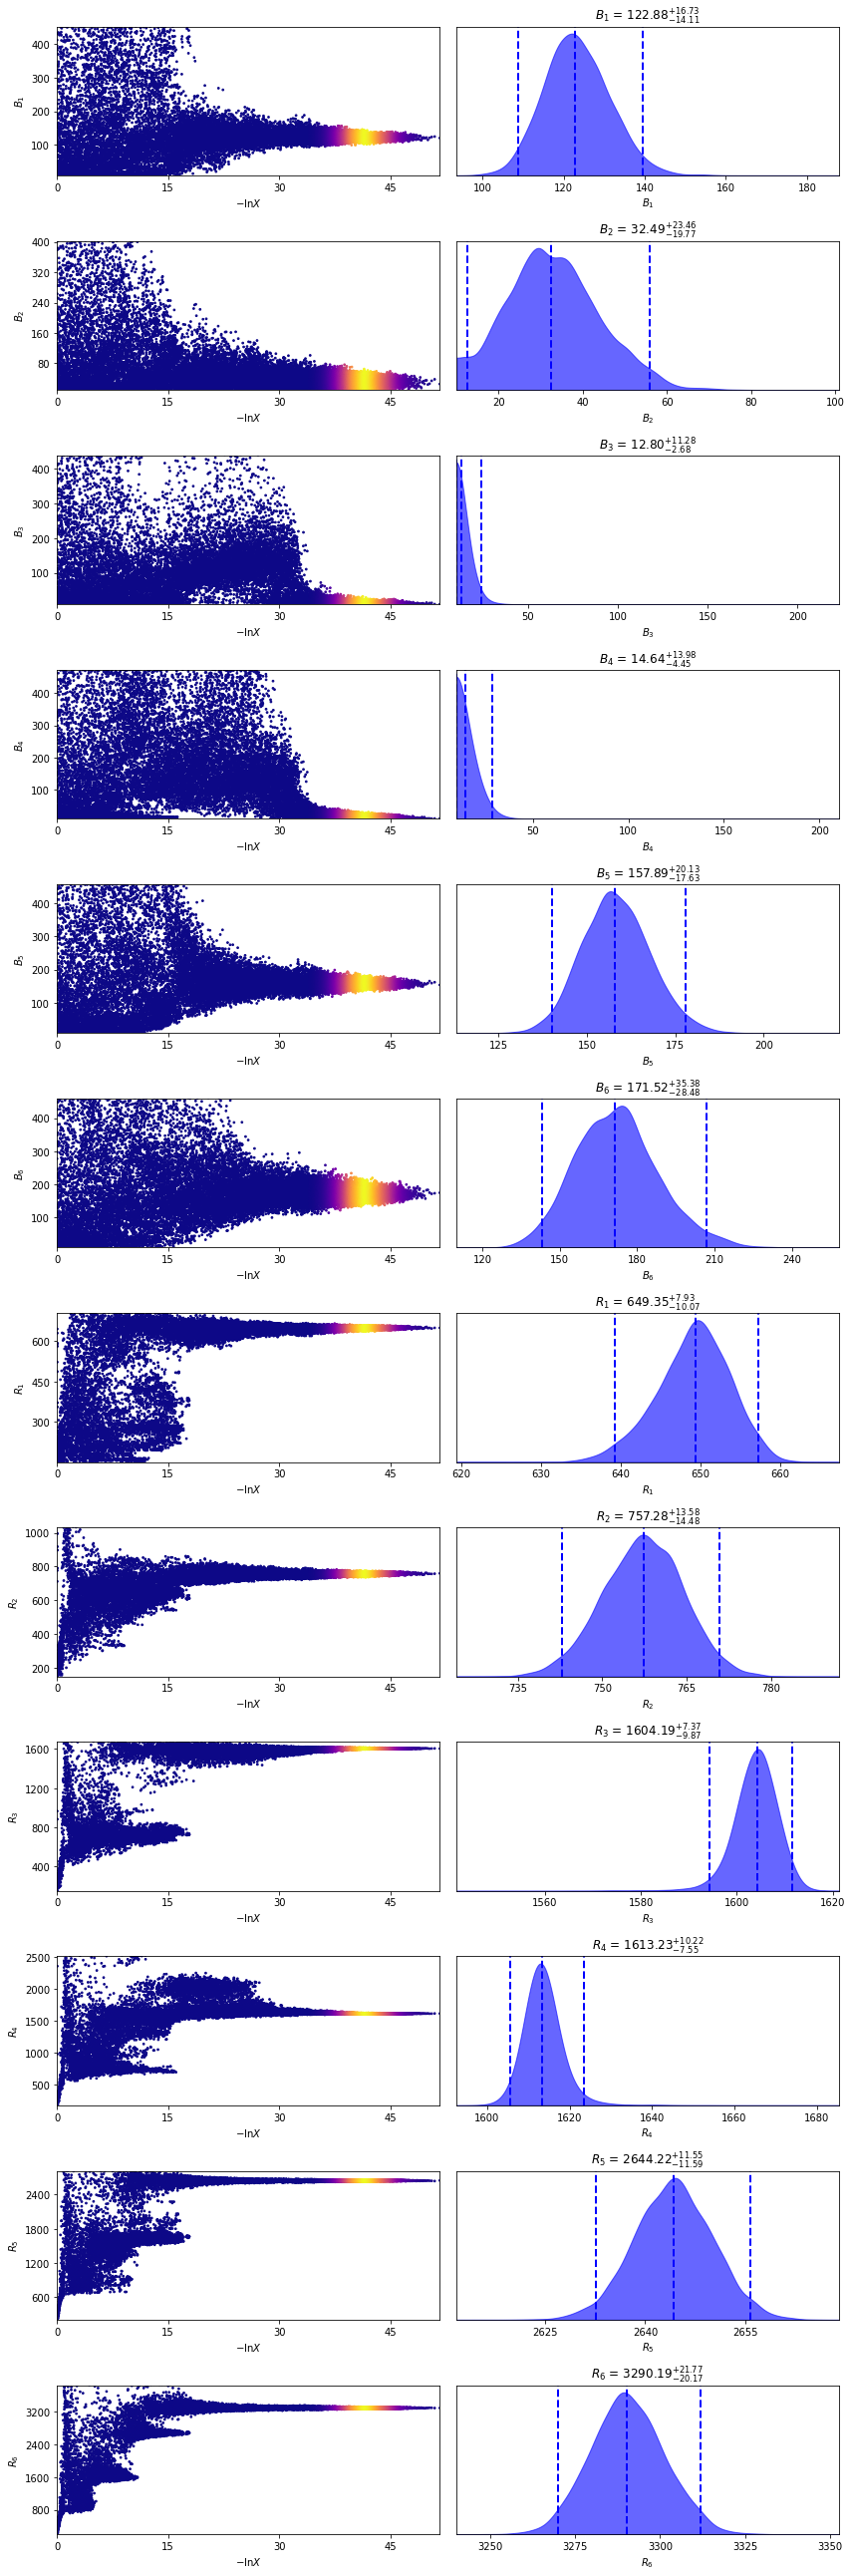

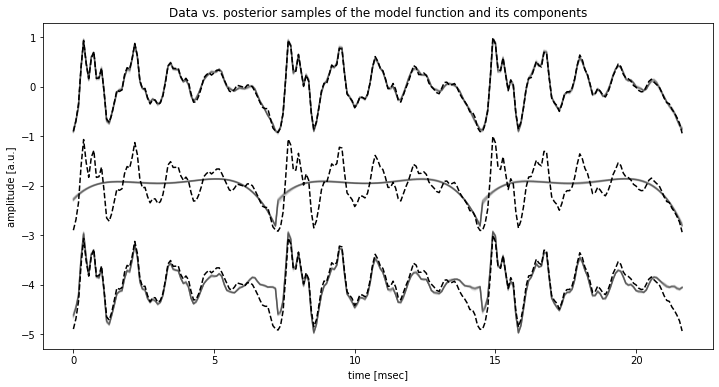

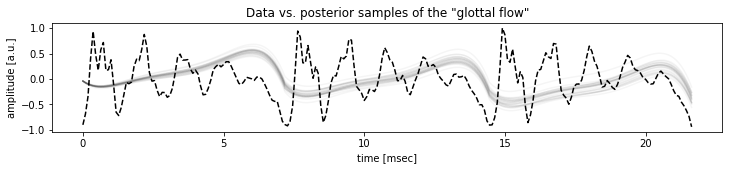

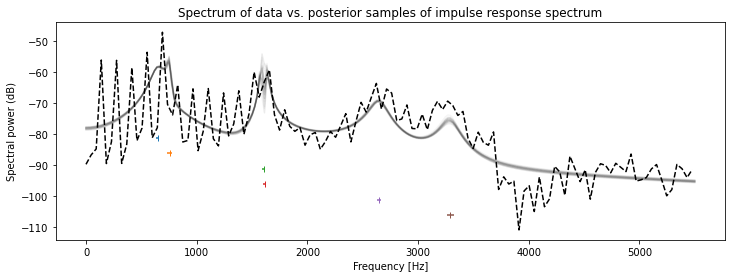

In [2]:
a = do('bdl/arctic_a0017', True, Q=6) # p(Q=6|data) ~ 39%

# æ in /ðæt/ ("that")
# F0 = 138 Hz
Posterior probability prob(P|Q=7,data):
╒═════════╕
│ P=5     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 203.75(27)
Information (nats) = 36.99105179382053
Approximate SNR (dB) = [21.52(47)]
Periodic to data power ratio PDR (dB) = -0.54(42)
Bandwidths and frequency estimates (Hz):
╒═════════╤════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ R1      │ R2         │ R3         │ R4          │ R5          │ R6          │ R7          │
╞═════════╪════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 254(88) │ 116.6(7.7) │ 25.7(9.5)  │ 13.7(3.6)   │ 14.6(4.4)   │ 160.5(9.2)  │ 167(15)     │
├─────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 184(11) │ 643.7(5.4) │ 757.5(7.0) │ 1603.9(6.5) │ 1615.0(6.1) │ 2646.4(5.6) │ 3287.4(9.9) │
╘═════════╧════════════╧════════════╧═════════════╧═════════════╧═════════════╧═════════════╛
Approximate amplitude 

/home/marnix/WRK/proj/paretochain/research/py/uninformative/formant.py:32: UserWarning: The number of formants Q is not the same across all 200 samples: filling out missing values with nans
Histogram of Q: (array([4, 5]), array([154,  46]))
  warn(


Bandwidths and frequency estimates (Hz):
╒══════════╤═══════════╤═══════════╤═══════════╤═════════════╕
│ F1       │ F2        │ F3        │ F4        │ F5          │
╞══════════╪═══════════╪═══════════╪═══════════╪═════════════╡
│ 153(22)  │ 129(18)   │ 176(31)   │ 207(13)   │ 207.6(6.4)  │
├──────────┼───────────┼───────────┼───────────┼─────────────┤
│ 578(201) │ 1395(387) │ 2409(438) │ 3124(260) │ 3268.9(5.7) │
╘══════════╧═══════════╧═══════════╧═══════════╧═════════════╛


/home/marnix/WRK/proj/paretochain/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


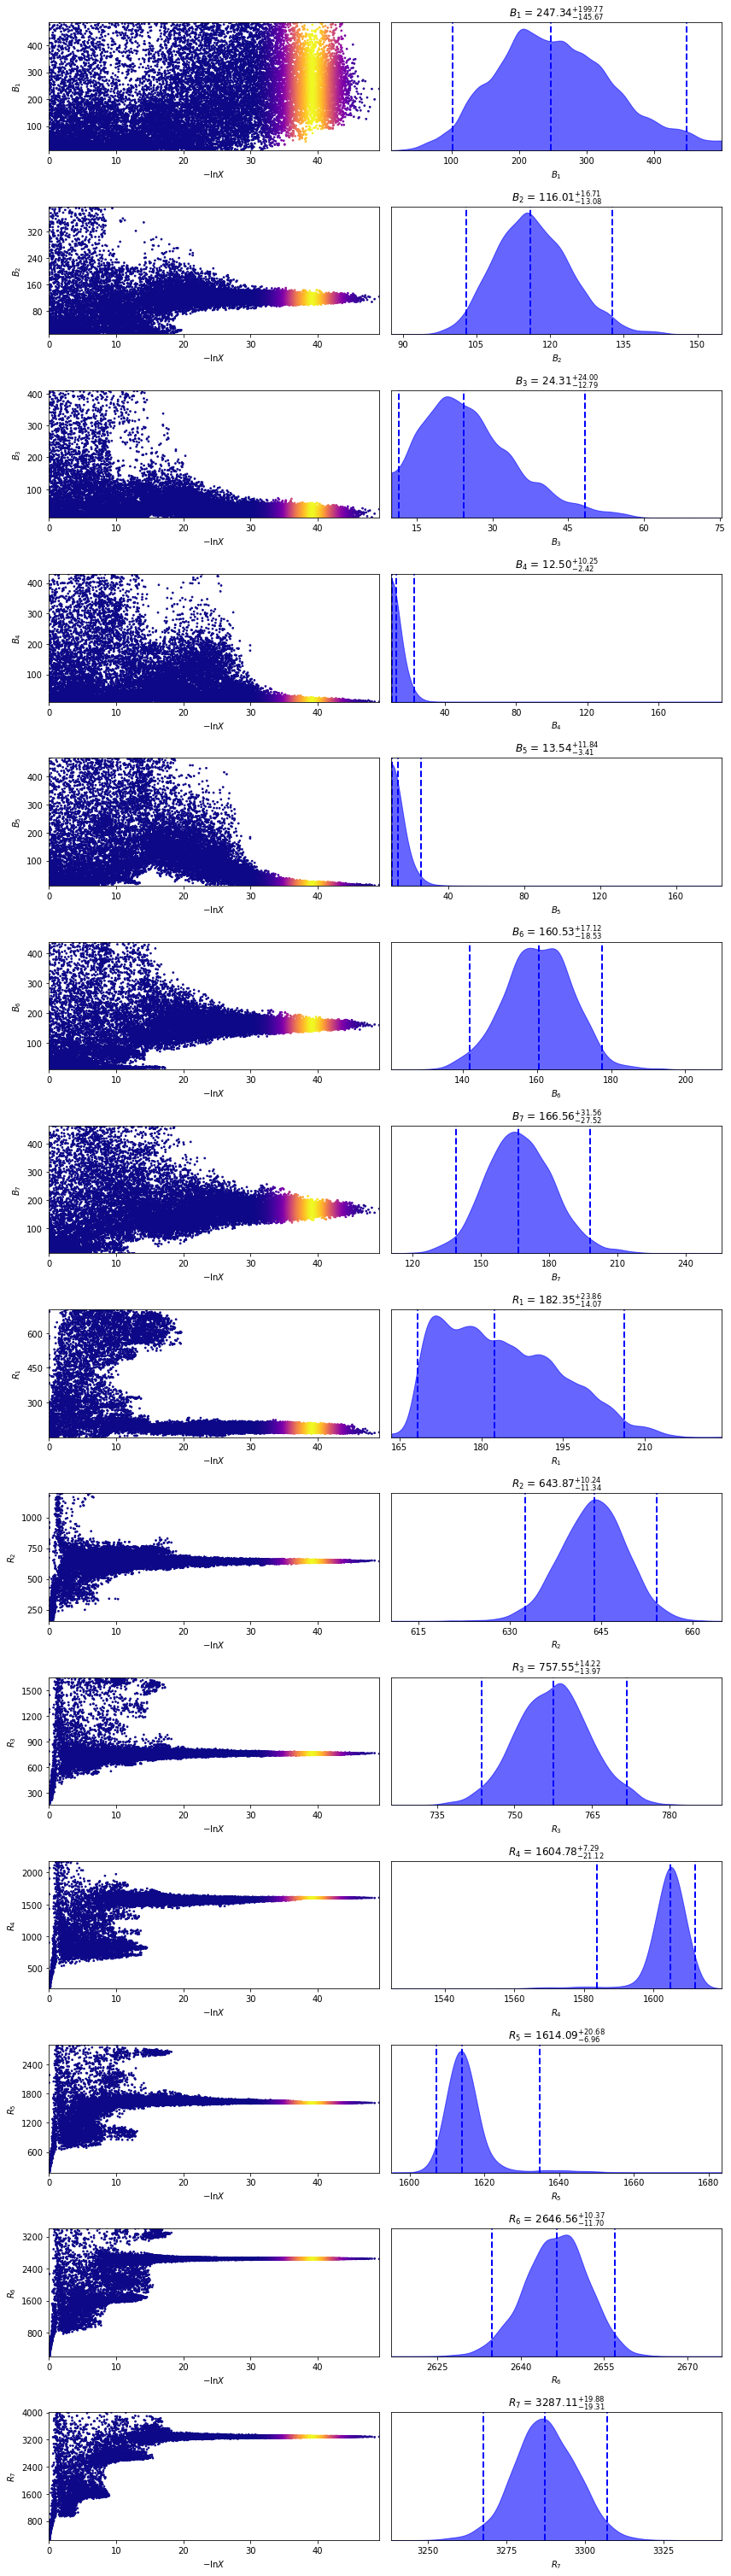

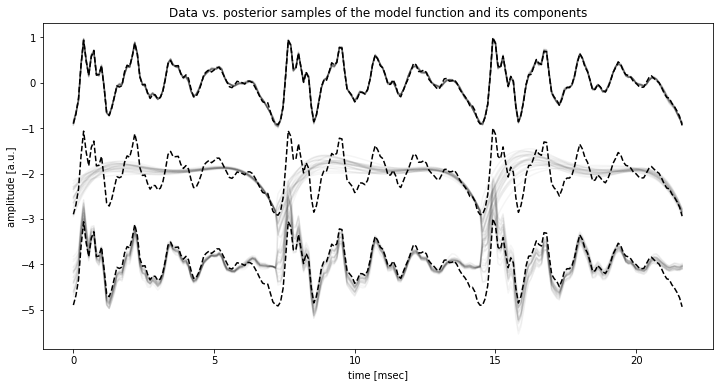

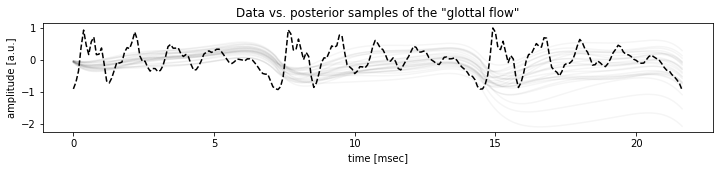

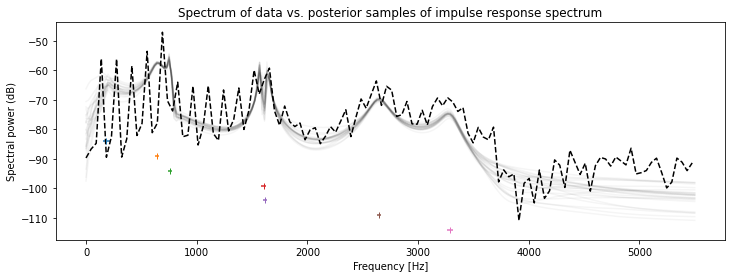

In [3]:
a = do('bdl/arctic_a0017', True, Q=7) # p(Q=7|data) ~ 61%

## `until`

- The structure in the noise shows that further poles are needed for its expansion -- the SNR is only about 18 dB, which is only +2 dB comparing to OA.

- Presence of very low frequency pole. F1 split in quartet, F2 triplet, F3 doublet. Most frequencies and bandwidths are well-resolved, hence the high information compared to OA.

- The 10 poles have been used to model the very intricate structure of the spectrum, including an (implicit) zero at around 2300 Hz and a very low resonance.

- There is a lot of uncertainty on the trend offset.

This is the case for which the `hyper_free12.py` model achieves improvements:

- SNR can be improved to 22 dB with 12 poles
- Low-frequency pole disappears
- "Glottal flow" estimate drastically improves

# ə in /ənˈtɪl/ ("until")
# F0 = 110 Hz
Posterior probability prob(P|Q=10,data):
╒═════════╕
│ P=6     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 220.71(28)
Information (nats) = 38.926982272813916
Approximate SNR (dB) = [18.29(23)]
Periodic to data power ratio PDR (dB) = -0.64(28)
Bandwidths and frequency estimates (Hz):
╒════════════╤═════════╤═════════╤═════════╤═════════╤══════════╤══════════╤══════════╤═════════════╤═════════════╕
│ R1         │ R2      │ R3      │ R4      │ R5      │ R6       │ R7       │ R8       │ R9          │ R10         │
╞════════════╪═════════╪═════════╪═════════╪═════════╪══════════╪══════════╪══════════╪═════════════╪═════════════╡
│ 176(91)    │ 260(45) │ 189(51) │ 100(14) │ 171(96) │ 147(26)  │ 90(15)   │ 183(46)  │ 76(14)      │ 75(14)      │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼──────────┼──────────┼─────────────┼─────────────┤
│ 166.6(9.0) │ 386(21) │ 533(16) │ 596(15) │ 659(20) │ 1426(12) │ 1467(10) │ 1584(27) │ 2563.6

/home/marnix/WRK/proj/paretochain/research/py/uninformative/formant.py:32: UserWarning: The number of formants Q is not the same across all 200 samples: filling out missing values with nans
Histogram of Q: (array([4, 5]), array([199,   1]))
  warn(


Bandwidths and frequency estimates (Hz):
╒════════════╤════════════╤════════════╤═══════════╤════════════╕
│ F1         │ F2         │ F3         │ F4        │ F5         │
╞════════════╪════════════╪════════════╪═══════════╪════════════╡
│ 104.8(3.8) │ 107.1(2.2) │ 113.3(1.3) │ 91.8(2.8) │ 91.9415(0) │
├────────────┼────────────┼────────────┼───────────┼────────────┤
│ 215.2(8.3) │ 565.8(2.6) │ 1434(44)   │ 2562(80)  │ 2569.04(0) │
╘════════════╧════════════╧════════════╧═══════════╧════════════╛


/home/marnix/WRK/proj/paretochain/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


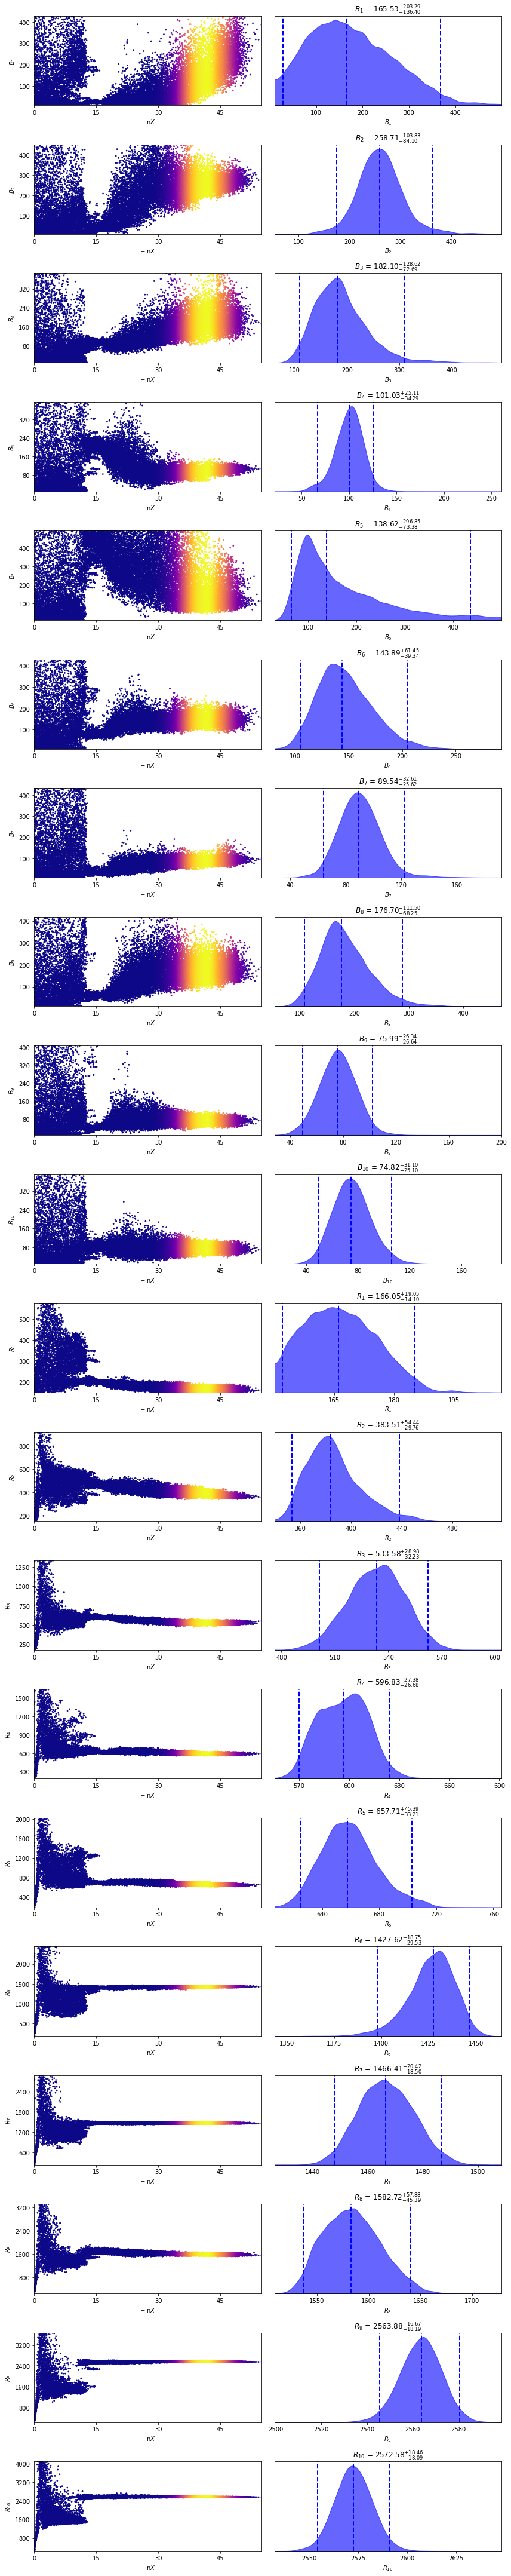

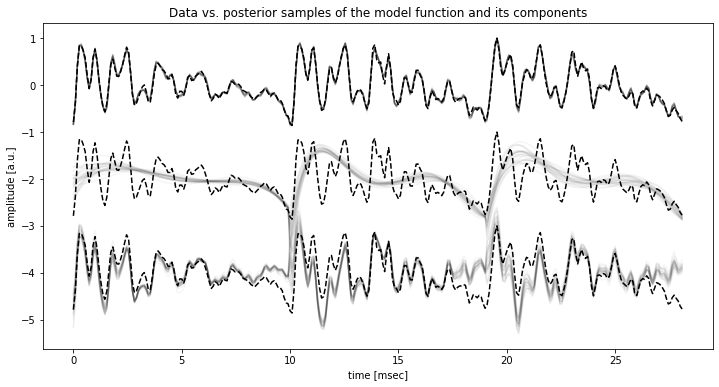

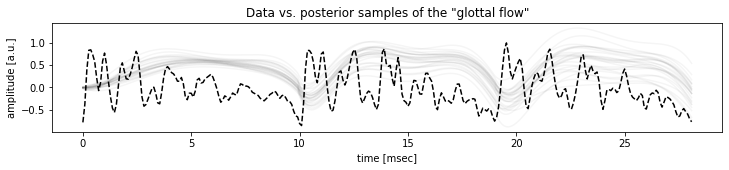

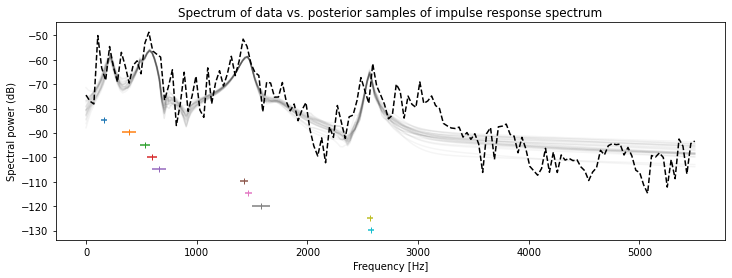

In [4]:
a = do('slt/arctic_b0041', True, Q=10)

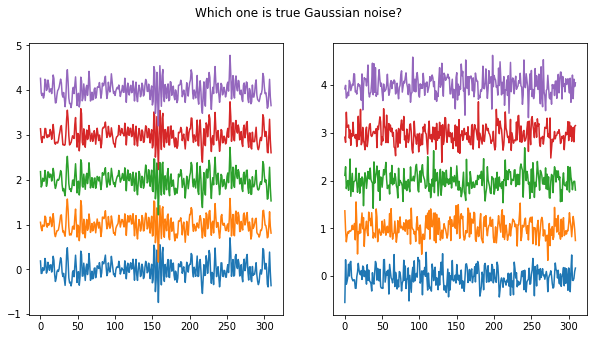

In [5]:
show_residuals(a)

## `little`

- Much higher $\log Z$ and information compared to OA, SNR +4 dB

- Better behaved trend and acceptable "glottal flow" estimate. OA's problem of low-frequency component in trend has been solved.

- Discovered F4! OA was limited to F3. Also resolved awkward shoulder in OA's F1 as a tiny extra peak.

- Splitting of F1 into a doublet, F2 into a triplet, both moderately resolved. F3 and F4 well resolved.

# ɪ in /ˈlɪt(ə)l/ ("little")
# F0 = 102 Hz
Posterior probability prob(P|Q=8,data):
╒═════════╕
│ P=8     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 464.43(35)
Information (nats) = 62.09662576048271
Approximate SNR (dB) = [27.00(19)]
Periodic to data power ratio PDR (dB) = -1.487(66)
Bandwidths and frequency estimates (Hz):
╒════════════╤═════════╤═════════╤══════════╤══════════╤═════════════╤═════════════╤══════════╕
│ R1         │ R2      │ R3      │ R4       │ R5       │ R6          │ R7          │ R8       │
╞════════════╪═════════╪═════════╪══════════╪══════════╪═════════════╪═════════════╪══════════╡
│ 78.6(2.4)  │ 175(35) │ 148(30) │ 124(19)  │ 124(31)  │ 53.9(9.6)   │ 110.8(8.0)  │ 204(28)  │
├────────────┼─────────┼─────────┼──────────┼──────────┼─────────────┼─────────────┼──────────┤
│ 424.4(3.4) │ 594(15) │ 619(14) │ 1271(13) │ 1343(19) │ 1456.8(3.9) │ 2638.3(5.0) │ 3537(20) │
╘════════════╧═════════╧═════════╧══════════╧══════════╧═════════════╧═════════════╧══════════╛


/home/marnix/WRK/proj/paretochain/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


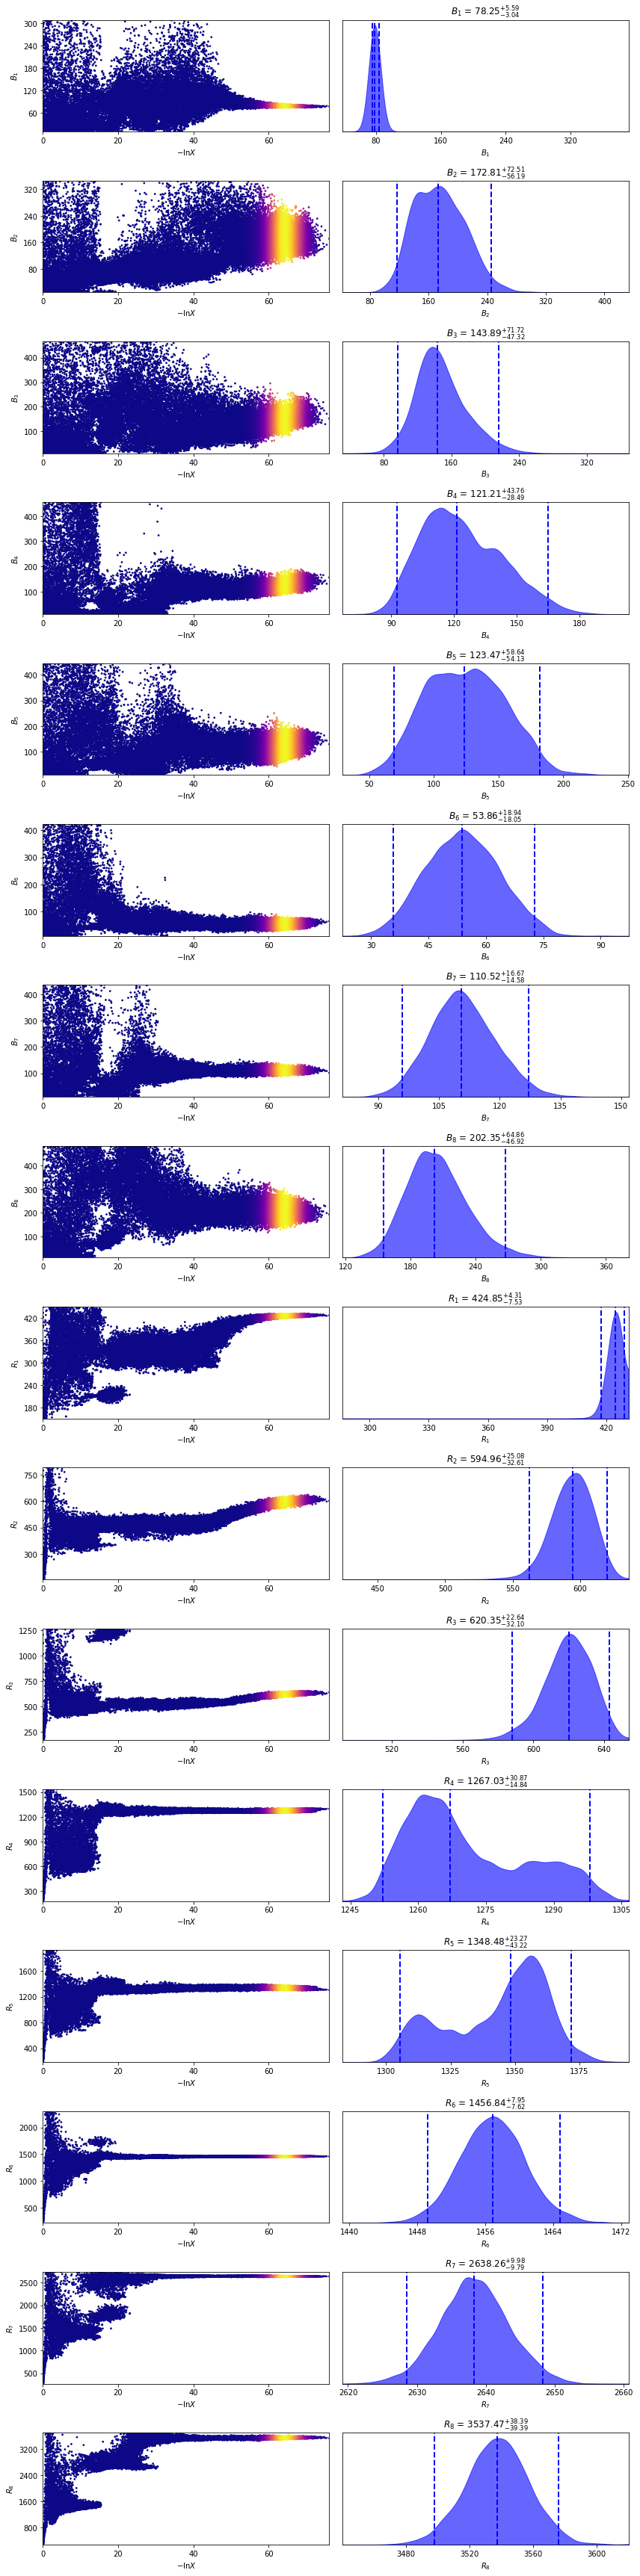

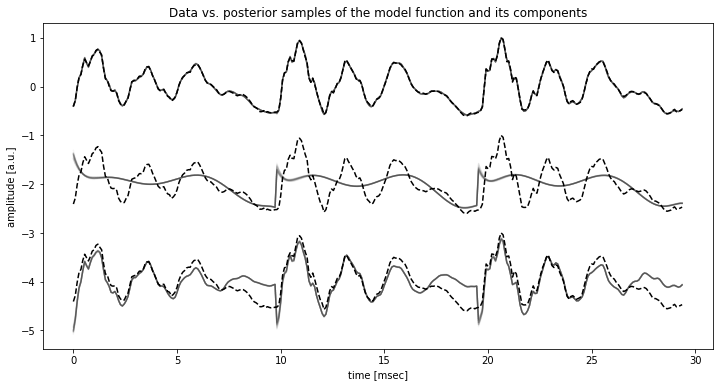

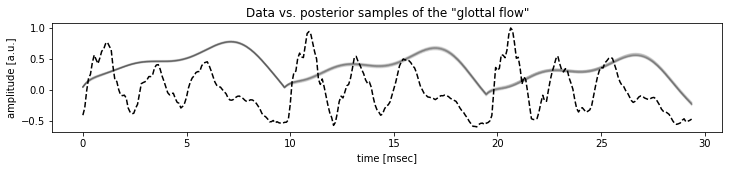

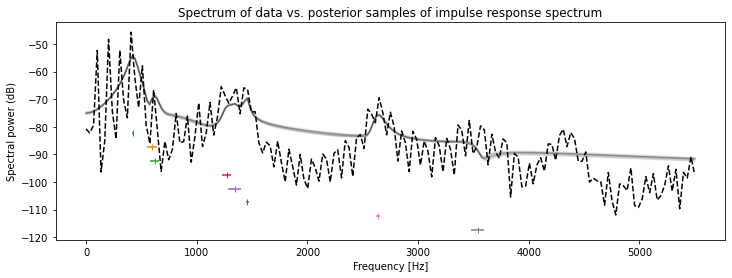

In [6]:
a = do('rms/arctic_a0382', True, Q=8)

## `you`

- OA's ambiguity in $P=9,10$ resolved to $P=7$. Similar trend and "GF" although more uncertain compared to OA.

- Very high SNR, +4 dB compared to OA. Intricate structure of the transfer function including a zero at about 1500 Hz.

- Discovered F4! OA was limited to F3.

- F1 split in broad triplet. F2 split in well resolved triplet (as in OA). F3 and F4 very well resolved.

# u in /juː/ ("you")
# F0 = 96
Posterior probability prob(P|Q=8,data):
╒═════════╕
│ P=7     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 815.97(30)
Information (nats) = 45.10999824875432
Approximate SNR (dB) = [36.66(20)]
Periodic to data power ratio PDR (dB) = -4.71(26)
Bandwidths and frequency estimates (Hz):
╒═════════╤═════════╤═════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│ R1      │ R2      │ R3      │ R4          │ R5          │ R6          │ R7          │ R8          │
╞═════════╪═════════╪═════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 214(95) │ 150(52) │ 96(23)  │ 94(10)      │ 89.4(9.0)   │ 100.3(7.5)  │ 118.4(5.6)  │ 122(20)     │
├─────────┼─────────┼─────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 254(24) │ 314(15) │ 416(10) │ 1554.9(5.5) │ 1646.8(5.1) │ 1758.9(4.3) │ 2218.1(3.0) │ 3226.9(8.3) │
╘═════════╧═════════╧═════════╧═════════════╧═════════════╧═════════════╧

/home/marnix/WRK/proj/paretochain/research/py/uninformative/formant.py:32: UserWarning: The number of formants Q is not the same across all 200 samples: filling out missing values with nans
Histogram of Q: (array([2, 3, 4]), array([ 10,  63, 127]))
  warn(


Bandwidths and frequency estimates (Hz):
╒════════════╤════════════╤═══════════╤═════════════╕
│ F1         │ F2         │ F3        │ F4          │
╞════════════╪════════════╪═══════════╪═════════════╡
│ 147.9(2.8) │ 244.5(7.4) │ 182(37)   │ 212(18)     │
├────────────┼────────────┼───────────┼─────────────┤
│ 316.0(1.8) │ 1685(13)   │ 2544(480) │ 3244.4(5.3) │
╘════════════╧════════════╧═══════════╧═════════════╛


/home/marnix/WRK/proj/paretochain/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


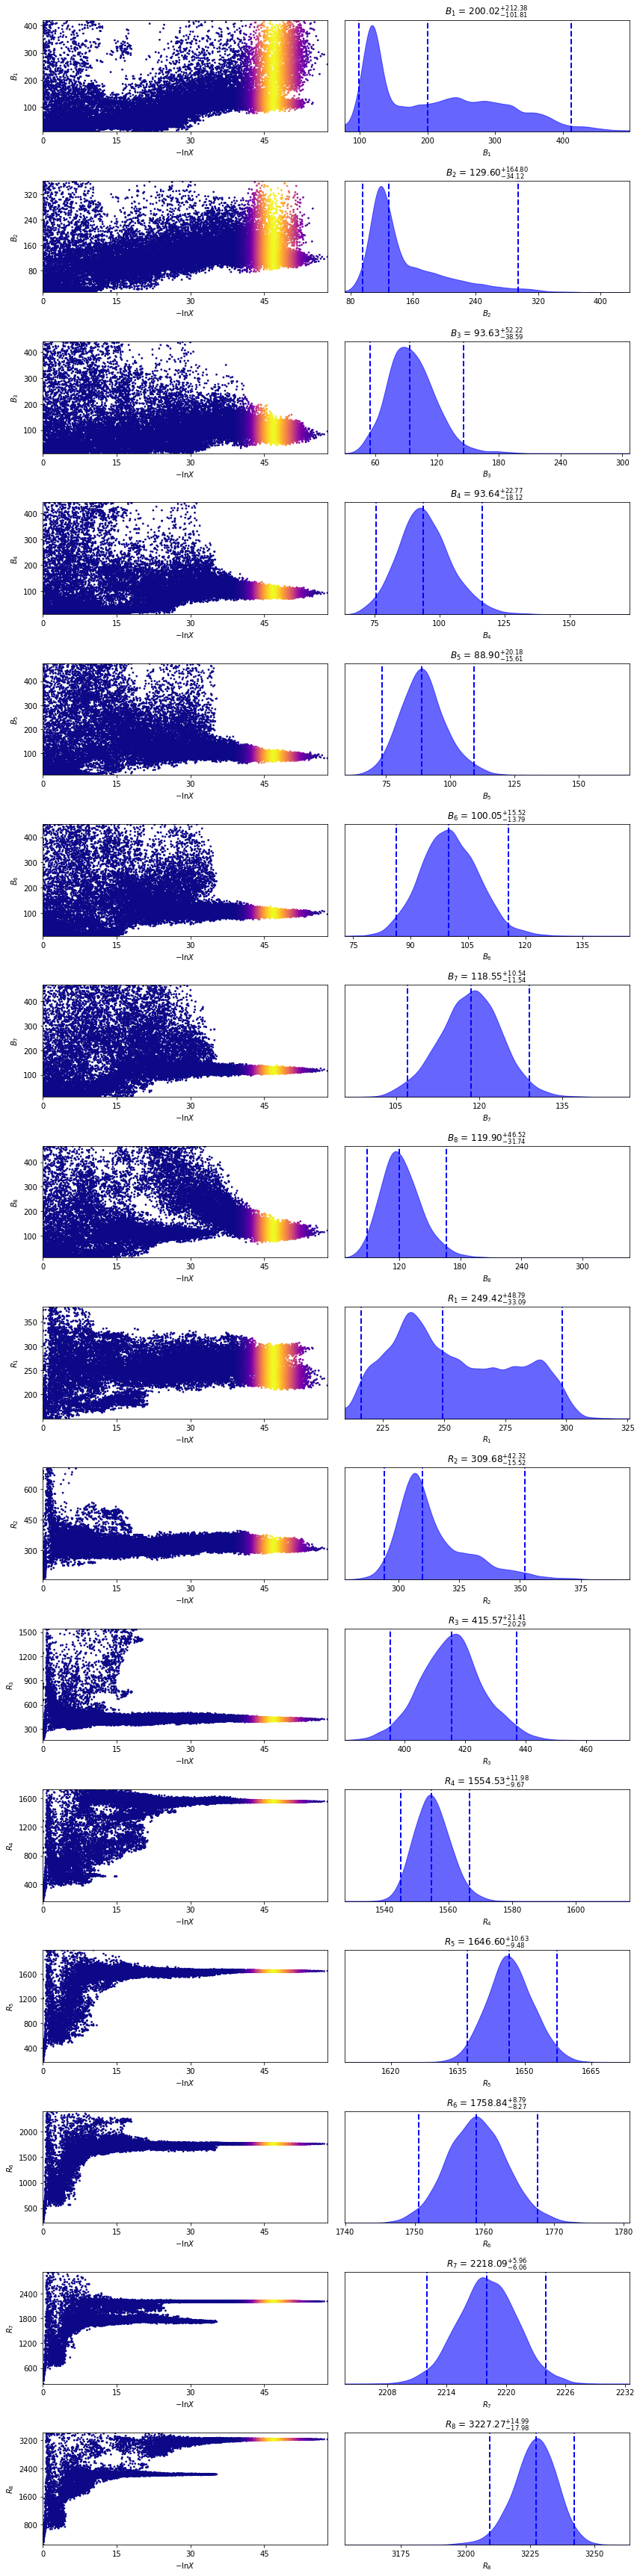

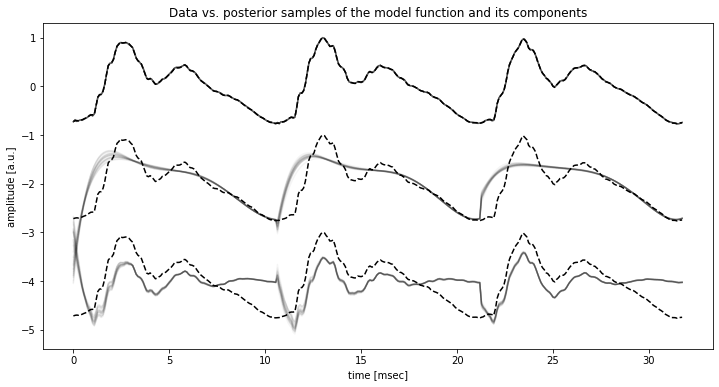

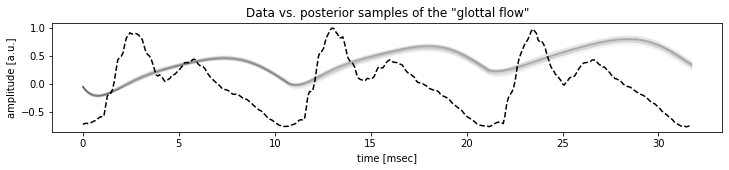

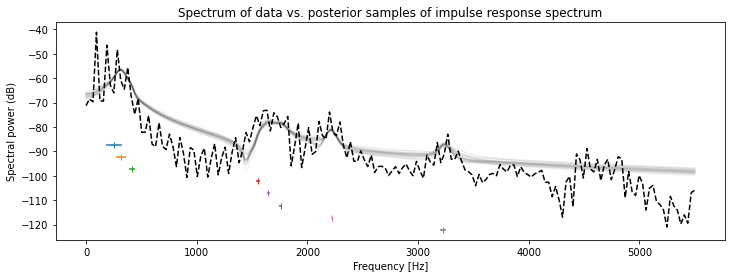

In [7]:
a = do("jmk/arctic_a0067", True, Q=8)

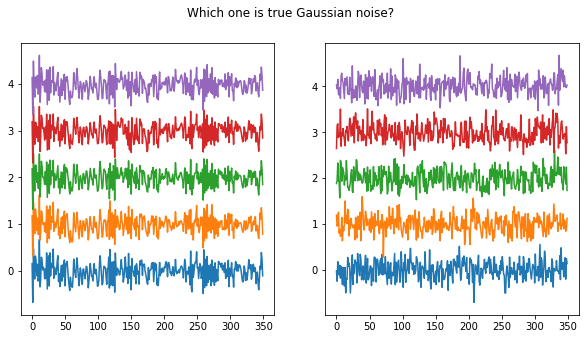

In [8]:
show_residuals(a)

## `shore`

- OA's ambiguity in $P=7,8,9$ resolved to a mere $P=5$. Low-frequency component of trend in OA has been absorbed, leaving an improved trend and "glottal flow" estimate, though the latter is uncertain because of uncertainty in the amplitude of the trend offset.

- *Extremely* high SNR of 40 dB, which is comparable to the difference in sound level between normal conversation and a chain saw. +7 dB compared to OA.

- Discovery of F3! OA was limited to F2.

- F1 and F2 are very broad peaks. F1 split in quartet, F2 split in triplet/quartet. Both with broad marginal posteriors of the bandwidths and frequencies involved. F3 well resolved.

# ɔ in /ʃɔː(r)/ ("shore")
# F0 = 113 Hz
Posterior probability prob(P|Q=9,data):
╒═════════╕
│ P=5     │
╞═════════╡
│ 100(0)% │
╘═════════╛
Log Z = 794.19(28)
Information (nats) = 38.032590772814615
Approximate SNR (dB) = [41.12(31)]
Periodic to data power ratio PDR (dB) = -1.528(97)
Bandwidths and frequency estimates (Hz):
╒══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╤═════════╤═════════════╕
│ R1       │ R2      │ R3      │ R4      │ R5      │ R6      │ R7         │ R8      │ R9          │
╞══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╪═════════╪═════════════╡
│ 197(123) │ 85(26)  │ 125(77) │ 147(80) │ 337(71) │ 162(73) │ 158(75)    │ 164(62) │ 104(12)     │
├──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────────┼─────────┼─────────────┤
│ 307(30)  │ 386(27) │ 452(28) │ 485(33) │ 671(51) │ 789(45) │ 833.7(9.2) │ 865(12) │ 2420.5(6.8) │
╘══════════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════════

/home/marnix/WRK/proj/paretochain/research/py/uninformative/plot.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


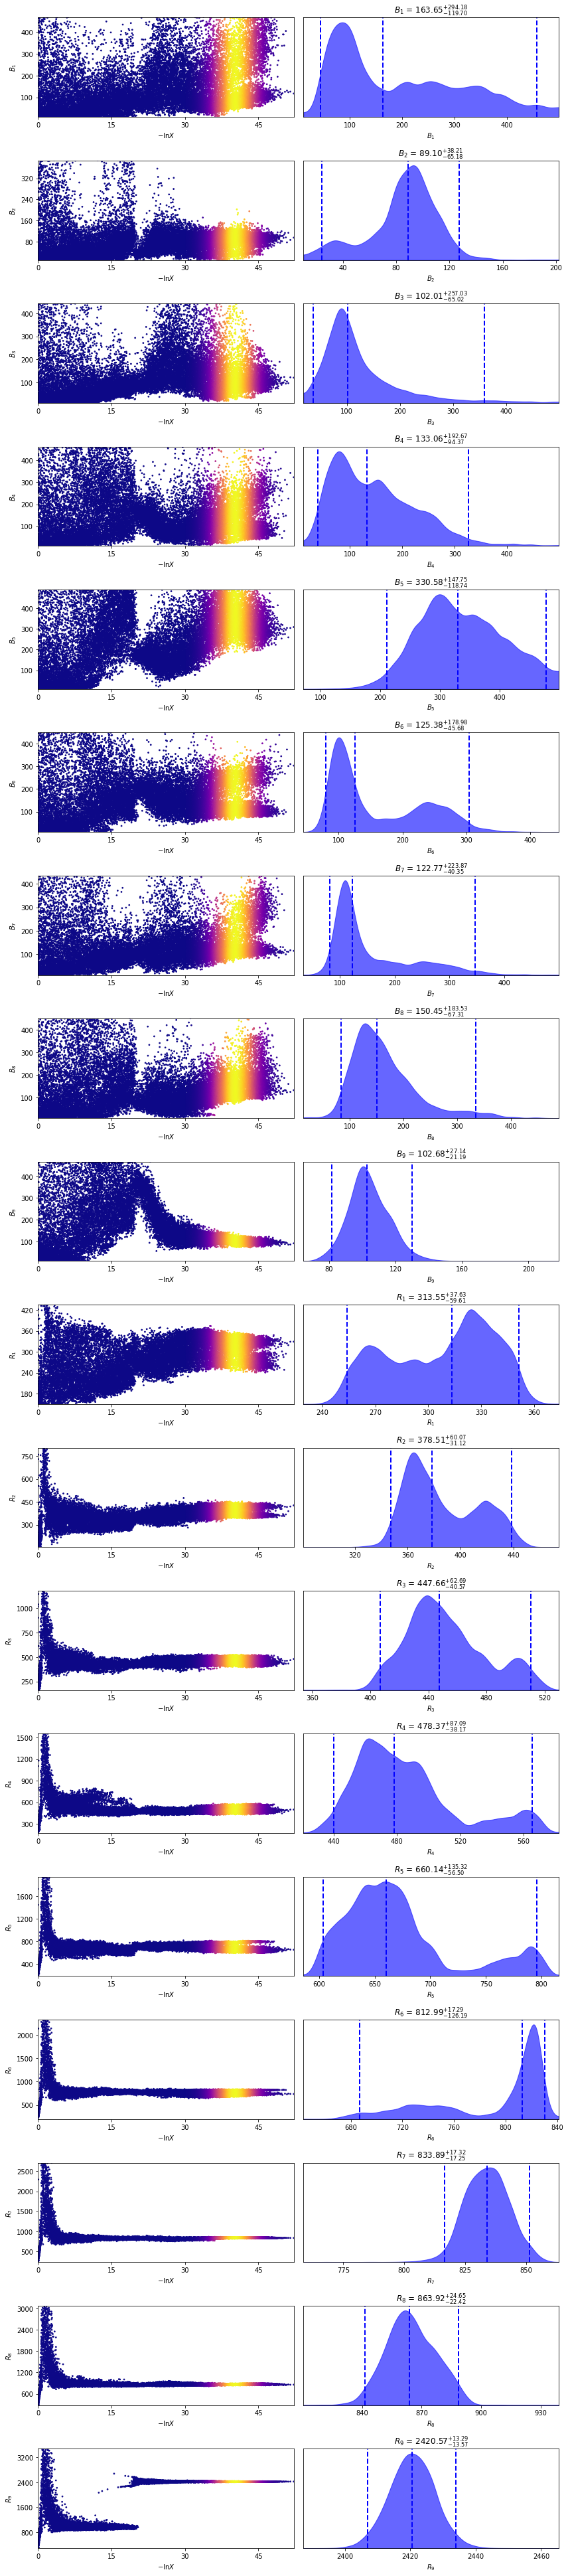

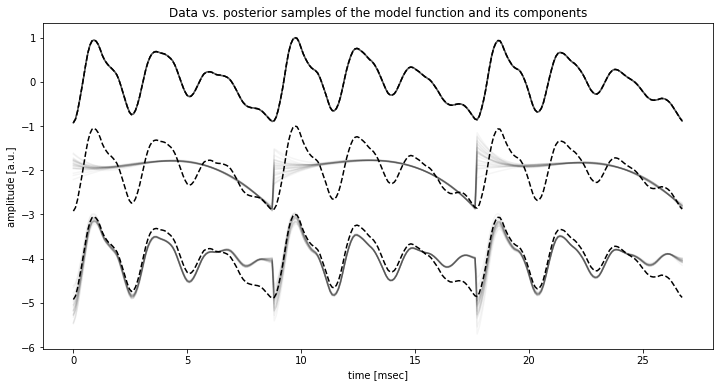

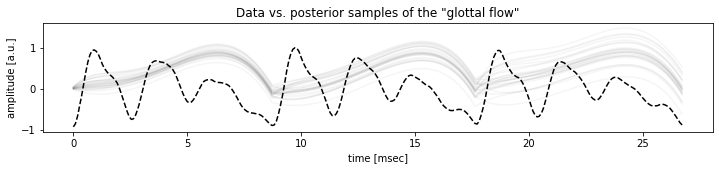

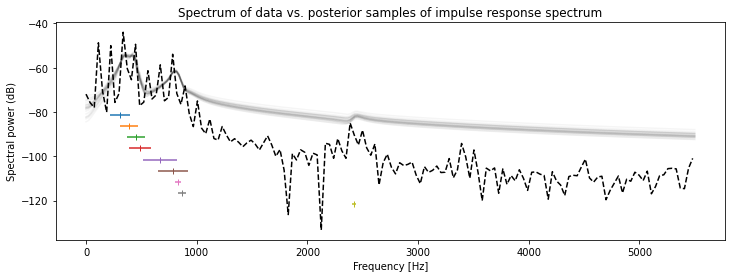

In [9]:
a = do('awb/arctic_a0094', True, Q=9)

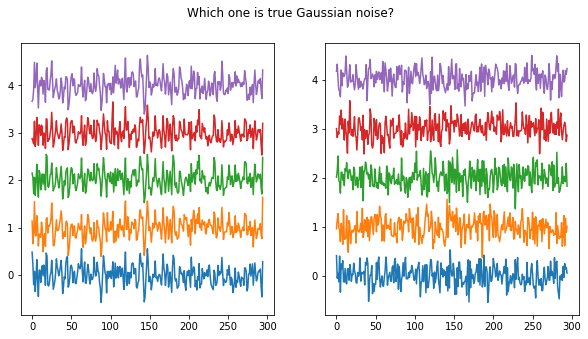

In [10]:
show_residuals(a)